### To understand the influence of various factors like economic, personal and social on the students performance ###

In [1]:
#import Libraries which needed

import re
import time
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
warnings.filterwarnings('ignore')

In [2]:
# call the dataset and read it

df = pd.read_csv("StudentsPerformance.csv")
df.sample(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
952,female,group E,some high school,free/reduced,none,74,74,72
861,female,group E,master's degree,free/reduced,none,81,86,87
124,male,group E,some college,standard,none,83,80,73
835,female,group C,high school,standard,completed,60,64,74
547,male,group C,high school,standard,completed,72,67,64
412,male,group D,associate's degree,standard,none,71,66,60
243,male,group E,some college,standard,none,59,51,43
923,female,group B,associate's degree,free/reduced,none,54,65,65
947,female,group D,some college,free/reduced,none,49,58,60
249,male,group C,high school,standard,none,68,60,53


In [3]:
# check the shape of dataset

df.shape

(1000, 8)

In [4]:
# statistical values of the dataset

df.describe()

,math score,reading score,writing score
count,1000.000,1000.000,1000.000
mean,66.089,69.169,68.054
std,15.163,14.600,15.196
min,0.000,17.000,10.000
25%,57.000,59.000,57.750
50%,66.000,70.000,69.000
75%,77.000,79.000,79.000
max,100.000,100.000,100.000


In [5]:
# check the null values 

df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### See numeric values on the graphs (math score, reading score, writing score) ###

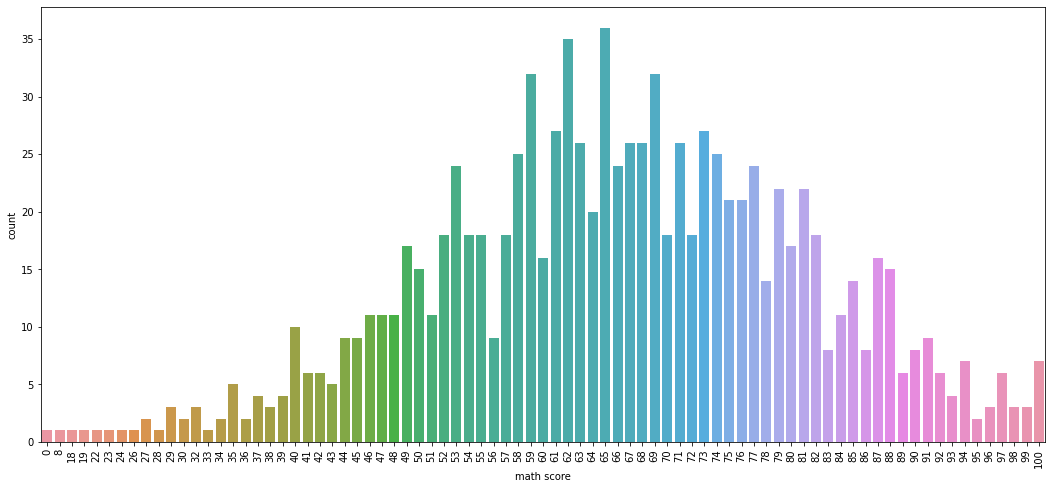

In [6]:
plt.figure(figsize=(18,8))
sns.countplot(df["math score"])
plt.xticks(rotation=90);

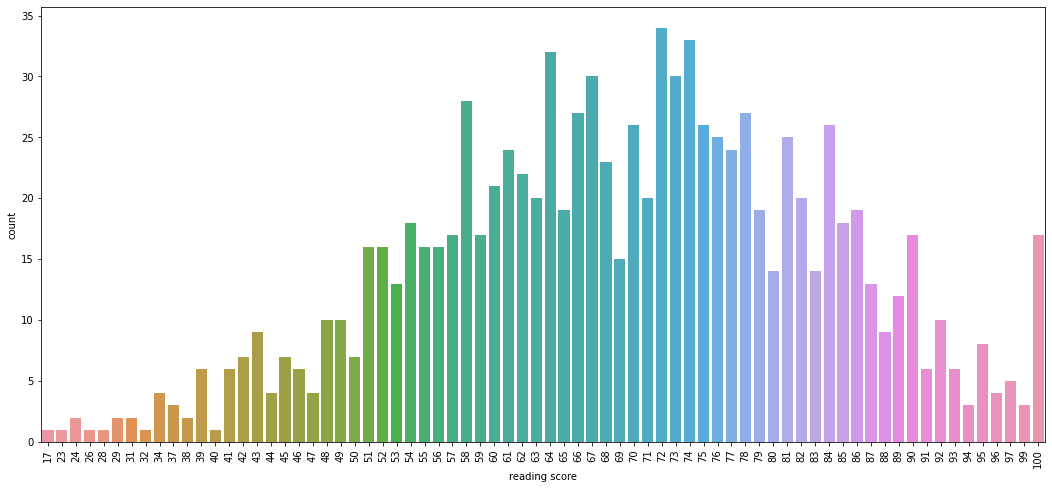

In [7]:
plt.figure(figsize=(18,8))
sns.countplot(df["reading score"])
plt.xticks(rotation=90);

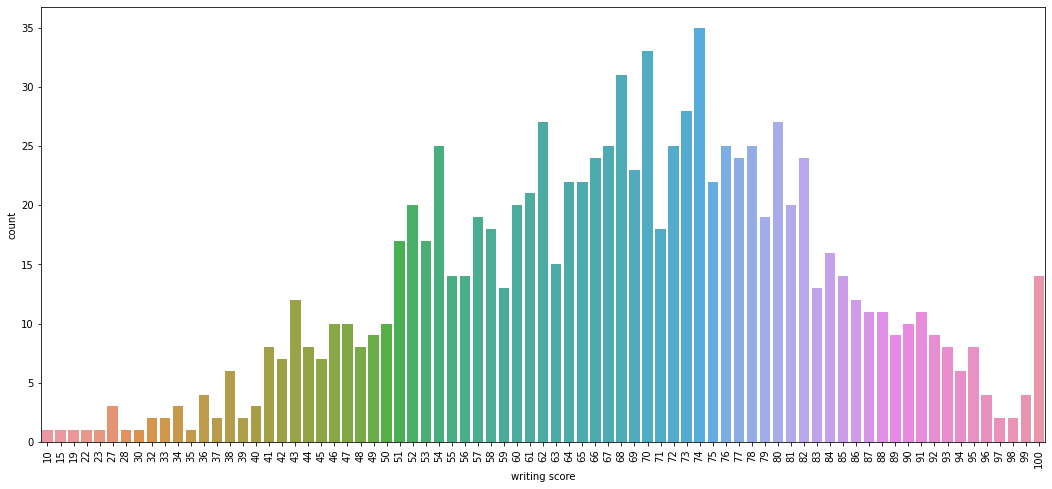

In [8]:
plt.figure(figsize=(18,8))
sns.countplot(df["writing score"])
plt.xticks(rotation=90);

In [9]:
# if math score, reading score and writing score above the mean values of all we can recognized the row like 'Pass'
# if only one score under the mean values of all we can recognized the row like "Fail"

df["Pass/Fail"] = df.apply(lambda x : "F" if x["math score"] < df["math score"].mean() or 
                                    x["reading score"] < df["reading score"].mean() or 
                                       x["writing score"] < df["writing score"].mean() else "P", axis =1)

df["Pass/Fail"].value_counts()

F    626
P    374
Name: Pass/Fail, dtype: int64

In [293]:
# check the head and see new column which named 'Pass/Fail'

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Pass/Fail
0,female,group B,bachelor's degree,standard,none,72,72,74,P
1,female,group C,some college,standard,completed,69,90,88,P
2,female,group B,master's degree,standard,none,90,95,93,P
3,male,group A,associate's degree,free/reduced,none,47,57,44,F
4,male,group C,some college,standard,none,76,78,75,P


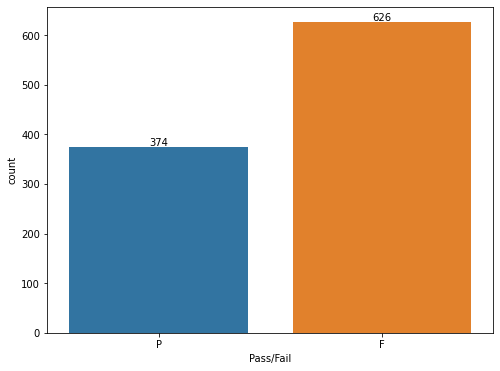

In [294]:
fig,ax = plt.subplots(figsize=(8,6))

ax = sns.countplot(x="Pass/Fail", data=df)

ax.bar_label(ax.containers[0]);

### Analyze Students Performance by Gender ###

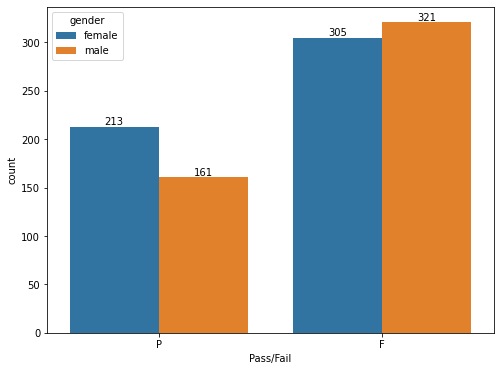

In [295]:
fig,ax = plt.subplots(figsize=(8,6))

ax = sns.countplot(x="Pass/Fail", hue="gender", data=df)

for container in ax.containers:
    ax.bar_label(container);

In [296]:
PF_gender = pd.DataFrame(df.groupby("gender")["Pass/Fail"].value_counts(normalize=True))
PF_gender.rename(columns={"Pass/Fail":"percentage"}, inplace=True)
PF_gender.reset_index(inplace=True)
PF_gender

,gender,Pass/Fail,percentage
0,female,F,0.589
1,female,P,0.411
2,male,F,0.666
3,male,P,0.334


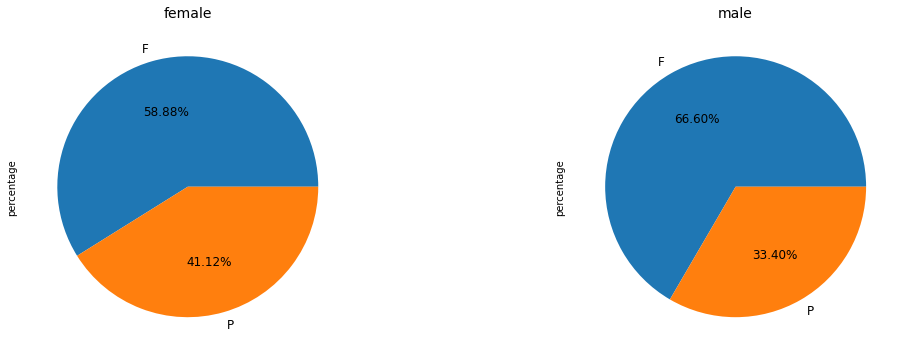

In [297]:
plt.figure(figsize = (18, 6))

index = 1
for i in [0, 2]:
    plt.subplot(1,2,index)
    PF_gender["percentage"][i:i+2].plot.pie(subplots=True,
                                         labels=PF_gender["Pass/Fail"],
                                         autopct="%.2f%%",
                                         textprops={'fontsize': 12})
    
    plt.title(PF_gender.gender[i], fontdict = {'fontsize': 14})
    index += 1

### Result Analysis:

- As can be seen in the graphs, you will see that women are more likely to get high grades.

### Analyze Students Performance by Race/Ethnicity ###

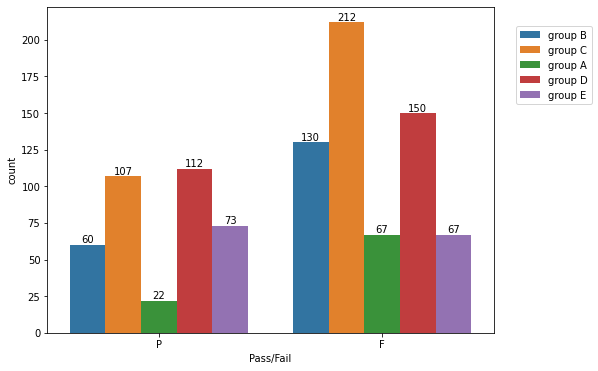

In [298]:
fig,ax = plt.subplots(figsize=(8,6))

ax = sns.countplot(x="Pass/Fail", hue="race/ethnicity", data=df)

for container in ax.containers:
    ax.bar_label(container)
    
plt.legend(loc=(1.05,0.7));

In [299]:
PF_race = pd.DataFrame(df.groupby("race/ethnicity")["Pass/Fail"].value_counts(normalize=True))
PF_race.rename(columns={"Pass/Fail":"percentage"}, inplace=True)
PF_race.reset_index(inplace=True)
PF_race

,race/ethnicity,Pass/Fail,percentage
0,group A,F,0.753
1,group A,P,0.247
2,group B,F,0.684
3,group B,P,0.316
4,group C,F,0.665
5,group C,P,0.335
6,group D,F,0.573
7,group D,P,0.427
8,group E,P,0.521
9,group E,F,0.479


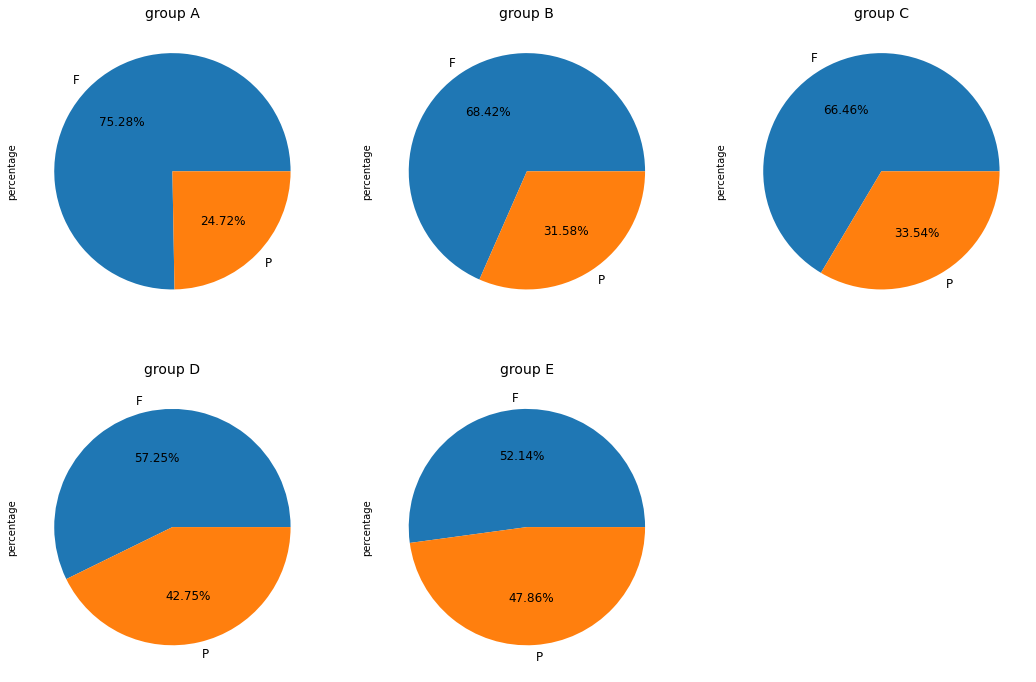

In [300]:
plt.figure(figsize = (18, 12))

index = 1
for i in [0, 2, 4, 6, 8]:
    plt.subplot(2,3,index)
    PF_race["percentage"][i:i+2].plot.pie(subplots=True,
                                         labels=PF_race["Pass/Fail"],
                                         autopct="%.2f%%",
                                         textprops={'fontsize': 12})
    
    plt.title(PF_race["race/ethnicity"][i], fontdict = {'fontsize': 14})
    index += 1

### Result Analysis:

- Ethnicity difference can affect students' success rate. We can think that the educational opportunities of the students in group a are more limited than the others.

### Analyze Students Performance by  Parental Level of Education ###

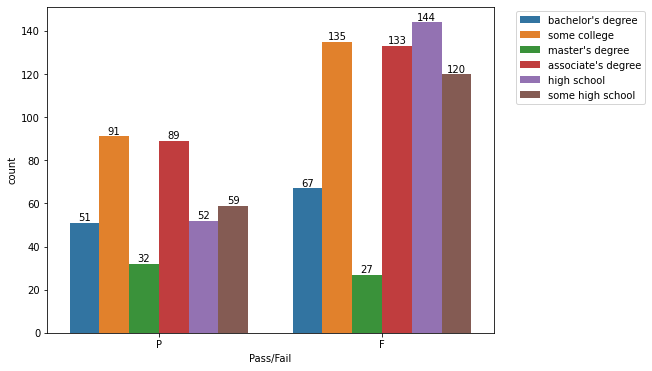

In [301]:
fig,ax = plt.subplots(figsize=(8,6))

ax = sns.countplot(x="Pass/Fail", hue="parental level of education", data=df)

for container in ax.containers:
    ax.bar_label(container)
    
plt.legend(loc=(1.05,0.7));

In [302]:
PF_parents = pd.DataFrame(df.groupby("parental level of education")["Pass/Fail"].value_counts(normalize=True))
PF_parents.rename(columns={"Pass/Fail":"percentage"}, inplace=True)
PF_parents.reset_index(inplace=True)
PF_parents

,parental level of education,Pass/Fail,percentage
0,associate's degree,F,0.599
1,associate's degree,P,0.401
2,bachelor's degree,F,0.568
3,bachelor's degree,P,0.432
4,high school,F,0.735
5,high school,P,0.265
6,master's degree,P,0.542
7,master's degree,F,0.458
8,some college,F,0.597
9,some college,P,0.403


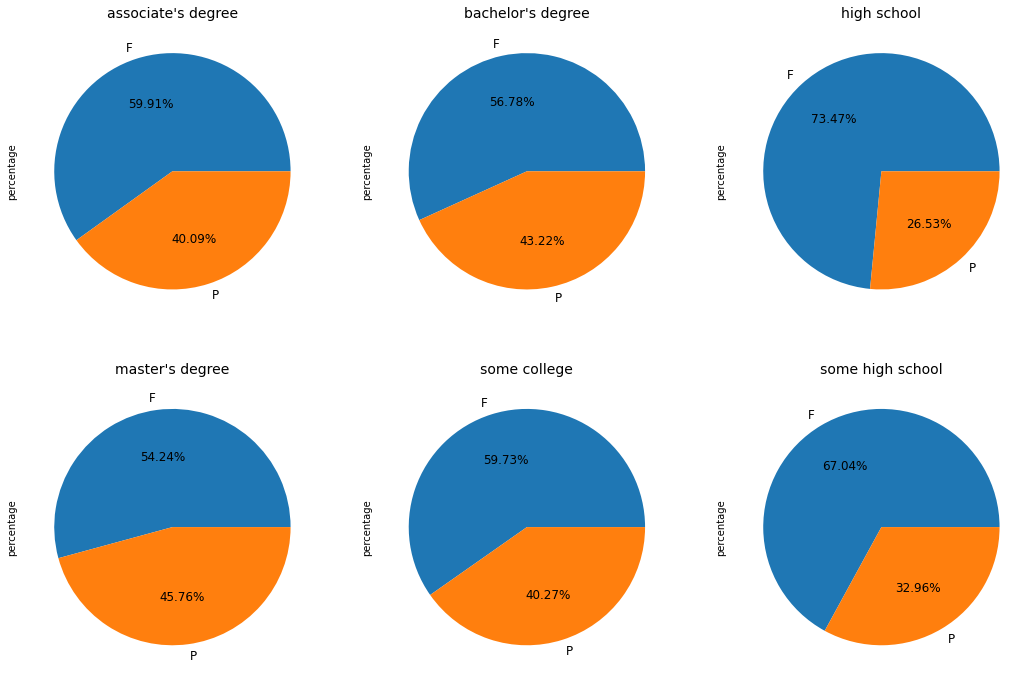

In [303]:
plt.figure(figsize = (18, 12))

index = 1
for i in [0, 2, 4, 6, 8, 10]:
    plt.subplot(2,3,index)
    PF_parents["percentage"][i:i+2].plot.pie(subplots=True,
                                         labels=PF_parents["Pass/Fail"],
                                         autopct="%.2f%%",
                                         textprops={'fontsize': 12})
    
    plt.title(PF_parents["parental level of education"][i], fontdict = {'fontsize': 14})
    index += 1

### Result Analysis:

- We can comment that the course success grades of the students whose parents did not receive a university education remain at a low level.

### Analyze Students Performance by  Lunch ###

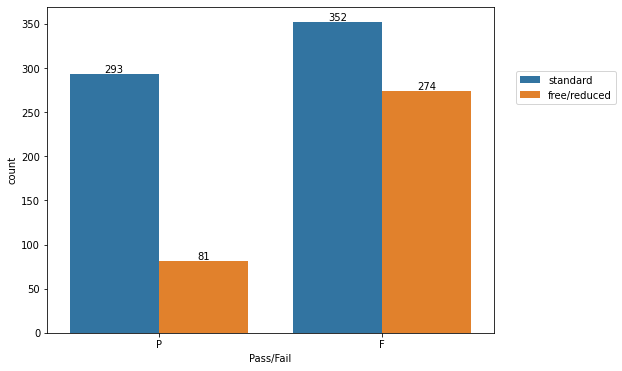

In [304]:
fig,ax = plt.subplots(figsize=(8,6))

ax = sns.countplot(x="Pass/Fail", hue="lunch", data=df)

for container in ax.containers:
    ax.bar_label(container)
    
plt.legend(loc=(1.05,0.7));

In [305]:
PF_lunch = pd.DataFrame(df.groupby("lunch")["Pass/Fail"].value_counts(normalize=True))
PF_lunch.rename(columns={"Pass/Fail":"percentage"}, inplace=True)
PF_lunch.reset_index(inplace=True)
PF_lunch

,lunch,Pass/Fail,percentage
0,free/reduced,F,0.772
1,free/reduced,P,0.228
2,standard,F,0.546
3,standard,P,0.454


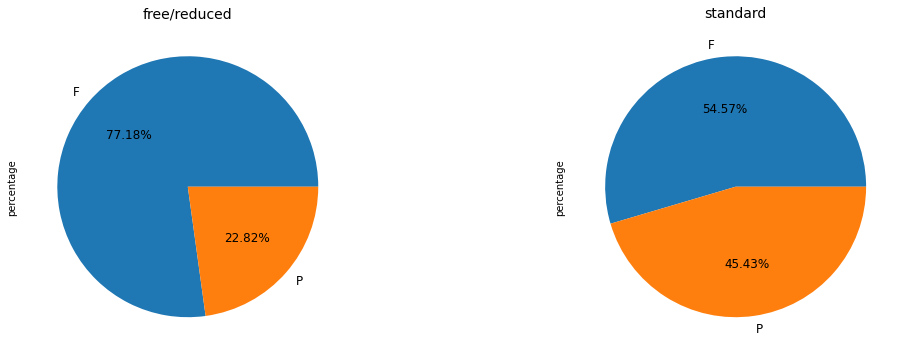

In [306]:
plt.figure(figsize = (18, 6))

index = 1
for i in [0, 2]:
    plt.subplot(1,2,index)
    PF_lunch["percentage"][i:i+2].plot.pie(subplots=True,
                                         labels=PF_lunch["Pass/Fail"],
                                         autopct="%.2f%%",
                                         textprops={'fontsize': 12})
    
    plt.title(PF_lunch.lunch[i], fontdict = {'fontsize': 14})
    index += 1

### Result Analysis:

- we can say that the standard lunch has a positive effect on the students's course success grades.

### Analyze Students Performance by  Test Preparation Course ###

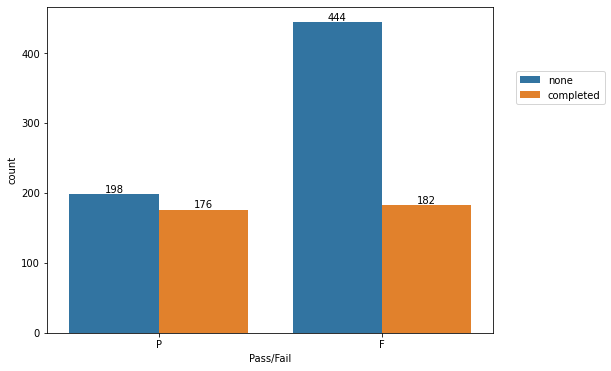

In [307]:
fig,ax = plt.subplots(figsize=(8,6))

ax = sns.countplot(x="Pass/Fail", hue="test preparation course", data=df)

for container in ax.containers:
    ax.bar_label(container)
    
plt.legend(loc=(1.05,0.7));

In [308]:
PF_test = pd.DataFrame(df.groupby("test preparation course")["Pass/Fail"].value_counts(normalize=True))
PF_test.rename(columns={"Pass/Fail":"percentage"}, inplace=True)
PF_test.reset_index(inplace=True)
PF_test

,test preparation course,Pass/Fail,percentage
0,completed,F,0.508
1,completed,P,0.492
2,none,F,0.692
3,none,P,0.308


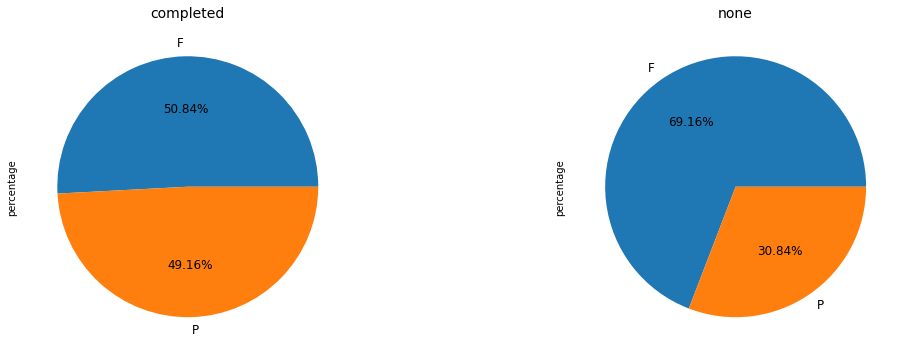

In [309]:
plt.figure(figsize = (18, 6))

index = 1
for i in [0, 2]:
    plt.subplot(1,2,index)
    PF_test["percentage"][i:i+2].plot.pie(subplots=True,
                                         labels=PF_test["Pass/Fail"],
                                         autopct="%.2f%%",
                                         textprops={'fontsize': 12})
    
    plt.title(PF_test["test preparation course"][i], fontdict = {'fontsize': 14})
    index += 1

### Result Analysis:

- Completed a test preparation course can provide a positive result in terms of better understanding and reinforcement of their lessons. The result of our analysis supports this. The success rate of the students who attend the test preparation course is higher.

### Analyze Outliers for Math, Reading and Writing Scores ###

In [310]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Pass/Fail
0,female,group B,bachelor's degree,standard,none,72,72,74,P
1,female,group C,some college,standard,completed,69,90,88,P
2,female,group B,master's degree,standard,none,90,95,93,P
3,male,group A,associate's degree,free/reduced,none,47,57,44,F
4,male,group C,some college,standard,none,76,78,75,P


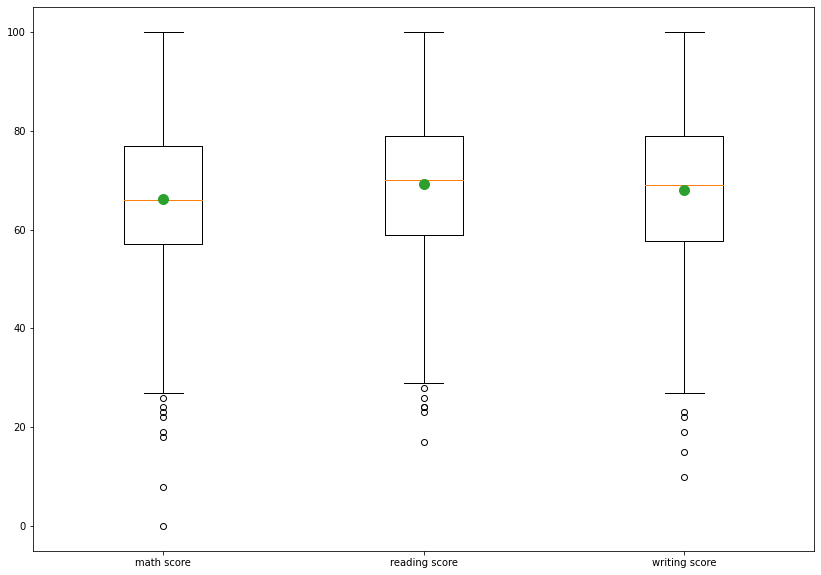

In [311]:
# see the outliers via boxplot graphs

plt.figure(figsize=(14,10))
plt.boxplot((df[df.select_dtypes('number').columns]), 
            labels=df.select_dtypes('number').columns,
            showmeans=True,
            meanprops={"marker":"o", "markersize":"10"});

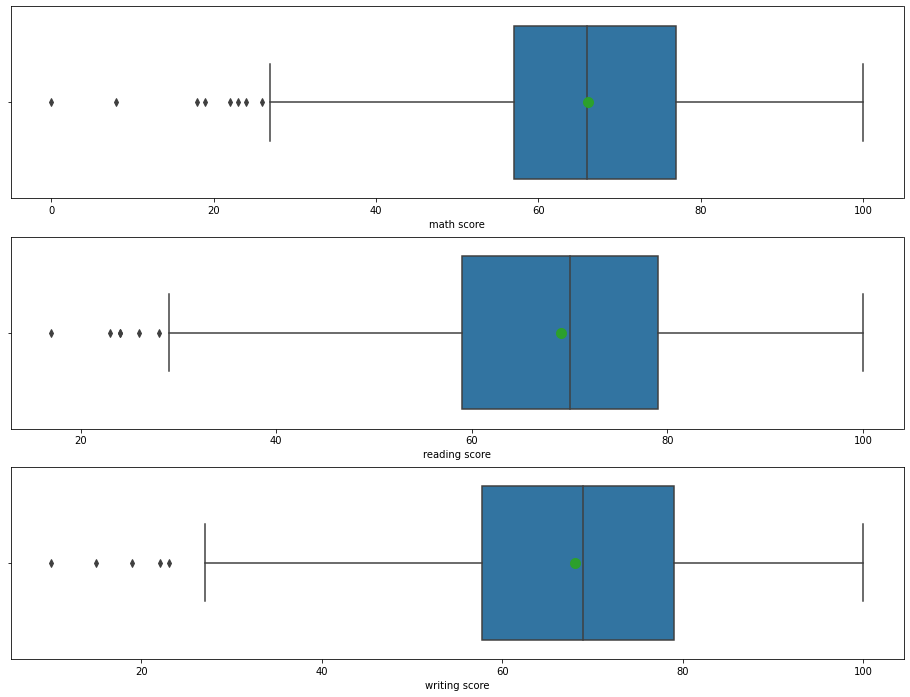

In [312]:
index = 0

plt.figure(figsize=(16, 12))
for i in df.select_dtypes('number').columns:
    index += 1
    plt.subplot(3,1,index)
    sns.boxplot(x=i, 
                data=df, 
                whis=1.5,
                showmeans=True,
                meanprops={"marker":"o",
                           "markersize":"10"})

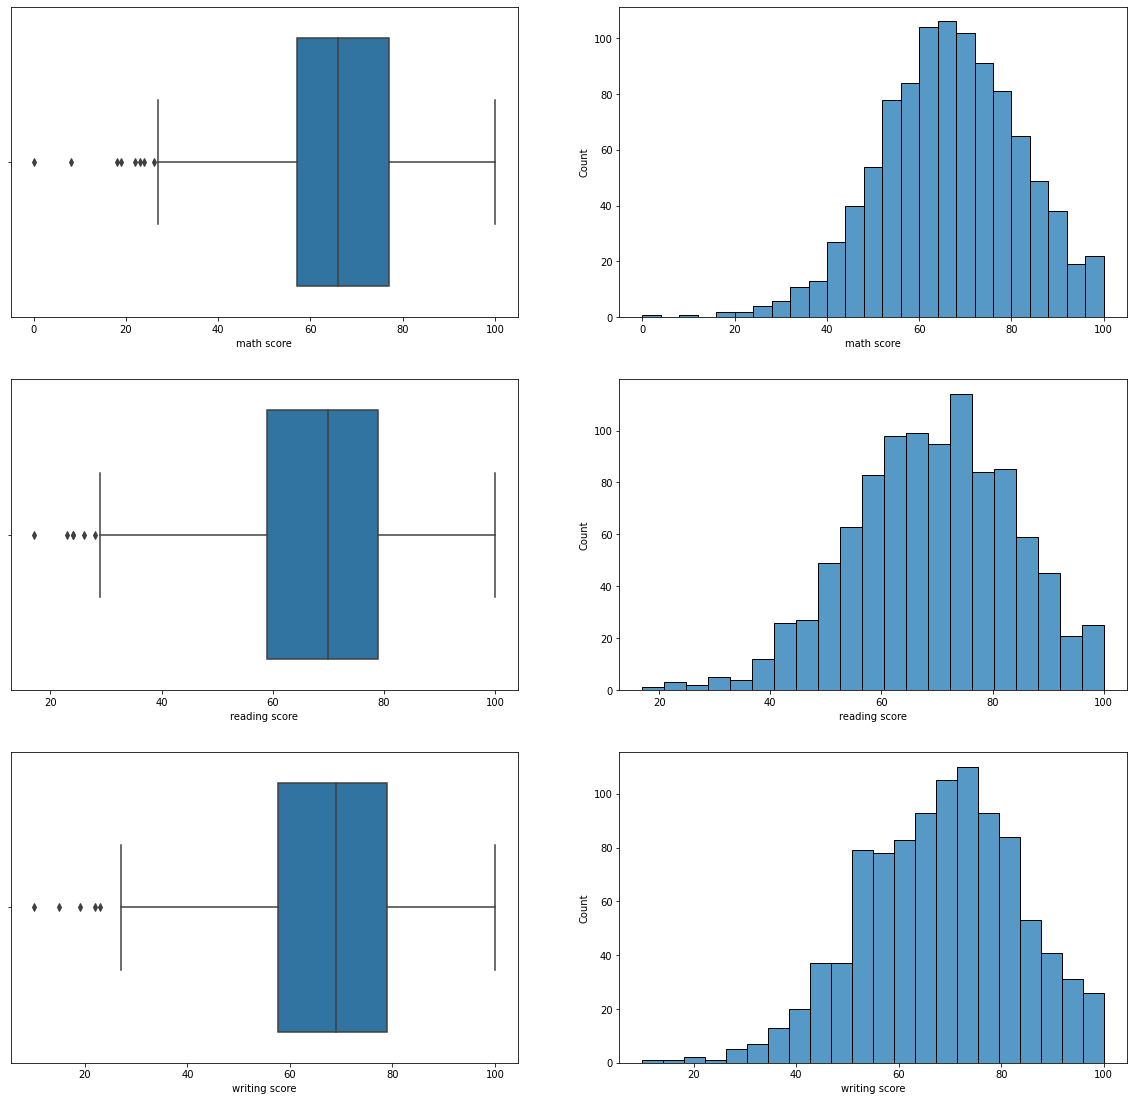

In [313]:
# check outliers with boxplot and skewness with histplot graphs

index = 0
plt.figure(figsize=(20, 40))
for feature in df.select_dtypes('number').columns:
    index += 1
    plt.subplot(6,2, index)
    sns.boxplot(x=feature, data=df, whis=1.5)
    index += 1
    plt.subplot(6,2,index)
    sns.histplot(x=feature, data=df)

In [314]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.000,66.089,15.163,0.000,57.000,66.000,77.000,100.000
reading score,1000.000,69.169,14.600,17.000,59.000,70.000,79.000,100.000
writing score,1000.000,68.054,15.196,10.000,57.750,69.000,79.000,100.000


### quantile values and iqr values for math score, reading score and writing score

In [315]:
Q1_m = df["math score"].quantile(0.25)
Q3_m = df["math score"].quantile(0.75)
IQR_m = Q3_m - Q1_m

low_lim_m = Q1_m - 1.5*IQR_m
upper_lim_m = Q3_m + 1.5*IQR_m

print("math score Q1         : ",Q1_m)
print("math score Q3         : ",Q3_m)
print("math score IQR        : ",IQR_m)
print("math score lower limit: ",low_lim_m)
print("math score upper limit: ",upper_lim_m)

math score Q1         :  57.0
math score Q3         :  77.0
math score IQR        :  20.0
math score lower limit:  27.0
math score upper limit:  107.0


In [316]:
Q1_r = df["reading score"].quantile(0.25)
Q3_r = df["reading score"].quantile(0.75)
IQR_r = Q3_r - Q1_r

low_lim_r = Q1_r - 1.5*IQR_r
upper_lim_r = Q3_r + 1.5*IQR_r

print("math score Q1         : ",Q1_r)
print("math score Q3         : ",Q3_r)
print("math score IQR        : ",IQR_r)
print("math score lower limit: ",low_lim_r)
print("math score upper limit: ",upper_lim_r)

math score Q1         :  59.0
math score Q3         :  79.0
math score IQR        :  20.0
math score lower limit:  29.0
math score upper limit:  109.0


In [317]:
Q1_w = df["writing score"].quantile(0.25)
Q3_w = df["writing score"].quantile(0.75)
IQR_w = Q3_w - Q1_w

low_lim_w = Q1_w - 1.5*IQR_w
upper_lim_w = Q3_w + 1.5*IQR_w

print("math score Q1         : ",Q1_w)
print("math score Q3         : ",Q3_w)
print("math score IQR        : ",IQR_w)
print("math score lower limit: ",low_lim_w)
print("math score upper limit: ",upper_lim_w)

math score Q1         :  57.75
math score Q3         :  79.0
math score IQR        :  21.25
math score lower limit:  25.875
math score upper limit:  110.875


In [318]:
# see the outliers rows

outliers = df[((df["math score"] < low_lim_m) | (df["math score"] > upper_lim_m)) |
              ((df["reading score"] < low_lim_r) | (df["reading score"] > upper_lim_r)) |
              ((df["writing score"] < low_lim_w) | (df["writing score"] > upper_lim_w))]
outliers

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Pass/Fail
17,female,group B,some high school,free/reduced,none,18,32,28,F
59,female,group C,some high school,free/reduced,none,0,17,10,F
76,male,group E,some high school,standard,none,30,26,22,F
145,female,group C,some college,free/reduced,none,22,39,33,F
211,male,group C,some college,free/reduced,none,35,28,27,F
327,male,group A,some college,free/reduced,none,28,23,19,F
338,female,group B,some high school,free/reduced,none,24,38,27,F
466,female,group D,associate's degree,free/reduced,none,26,31,38,F
596,male,group B,high school,free/reduced,none,30,24,15,F
787,female,group B,some college,standard,none,19,38,32,F


In [319]:
outliers.shape

(12, 9)

In [320]:
# drop the outliers from the dataset

df.drop(outliers.index, inplace=True)

In [321]:
df.shape

(988, 9)

In [322]:
df.reset_index(drop=True, inplace=True)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Pass/Fail
0,female,group B,bachelor's degree,standard,none,72,72,74,P
1,female,group C,some college,standard,completed,69,90,88,P
2,female,group B,master's degree,standard,none,90,95,93,P
3,male,group A,associate's degree,free/reduced,none,47,57,44,F
4,male,group C,some college,standard,none,76,78,75,P


In [323]:
df["parental level of education"].value_counts()

some college          222
associate's degree    221
high school           193
some high school      175
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [324]:
# recognize 'high_level' if the parents take education from university else recognize them 'medium_level'

df["levels_education"] = df["parental level of education"].apply(lambda x : "high_level" if x in ["bachelor's degree","master's degree"] else "medium_level")

df["levels_education"].value_counts()

medium_level    811
high_level      177
Name: levels_education, dtype: int64

In [325]:
# change the categorical values with 0 and 1 numeric values for ML

df["gender"] = df["gender"].map({"female" : 0, "male" : 1})
df["levels_education"] = df["levels_education"].map({"medium_level" : 0, "high_level" : 1})
df["lunch"] = df["lunch"].map({"free/reduced" : 0, "standard" : 1})
df["test preparation course"] = df["test preparation course"].map({"none" : 0, "completed" : 1})
df["Pass/Fail"] = df["Pass/Fail"].map({"F" : 0, "P" : 1})

In [326]:
# drop the categorical columns

df.drop("parental level of education", axis=1, inplace=True)

In [327]:
df.reset_index(drop=True, inplace=True)
df.head()

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,Pass/Fail,levels_education
0,0,group B,1,0,72,72,74,1,1
1,0,group C,1,1,69,90,88,1,0
2,0,group B,1,0,90,95,93,1,1
3,1,group A,0,0,47,57,44,0,0
4,1,group C,1,0,76,78,75,1,0


In [328]:
df.shape

(988, 9)

In [347]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,988.000,0.484,0.500,0.000,0.000,0.000,1.000,1.000
lunch,988.000,0.651,0.477,0.000,0.000,1.000,1.000,1.000
test preparation course,988.000,0.361,0.481,0.000,0.000,0.000,1.000,1.000
math score,988.000,66.626,14.409,27.000,57.000,66.000,77.000,100.000
reading score,988.000,69.641,14.017,29.000,60.000,70.000,80.000,100.000
writing score,988.000,68.567,14.525,27.000,58.000,69.000,79.000,100.000
Pass/Fail,988.000,0.379,0.485,0.000,0.000,0.000,1.000,1.000
levels_education,988.000,0.179,0.384,0.000,0.000,0.000,0.000,1.000


In [348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   gender                   988 non-null    int64 
 1   race/ethnicity           988 non-null    object
 2   lunch                    988 non-null    int64 
 3   test preparation course  988 non-null    int64 
 4   math score               988 non-null    int64 
 5   reading score            988 non-null    int64 
 6   writing score            988 non-null    int64 
 7   Pass/Fail                988 non-null    int64 
 8   levels_education         988 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 69.6+ KB


In [329]:
# convert the all columns to numeric values with pandas get_dummies function

df_dum = pd.get_dummies(df, drop_first=True)
df_dum.head()

,gender,lunch,test preparation course,math score,reading score,writing score,Pass/Fail,levels_education,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,0,1,0,72,72,74,1,1,1,0,0,0
1,0,1,1,69,90,88,1,0,0,1,0,0
2,0,1,0,90,95,93,1,1,1,0,0,0
3,1,0,0,47,57,44,0,0,0,0,0,0
4,1,1,0,76,78,75,1,0,0,1,0,0


In [330]:
df_dum.shape

(988, 12)

In [349]:
df_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   gender                   988 non-null    int64
 1   lunch                    988 non-null    int64
 2   test preparation course  988 non-null    int64
 3   math score               988 non-null    int64
 4   reading score            988 non-null    int64
 5   writing score            988 non-null    int64
 6   Pass/Fail                988 non-null    int64
 7   levels_education         988 non-null    int64
 8   race/ethnicity_group B   988 non-null    uint8
 9   race/ethnicity_group C   988 non-null    uint8
 10  race/ethnicity_group D   988 non-null    uint8
 11  race/ethnicity_group E   988 non-null    uint8
dtypes: int64(8), uint8(4)
memory usage: 65.7 KB


In [337]:
# Take a look at correlation between features by utilizing power of visualizing

df_dum.corr().style.text_gradient(axis=None, vmin=-1, vmax=1)

,gender,lunch,test preparation course,math score,reading score,writing score,Pass/Fail,levels_education,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
gender,1.000000,0.016624,0.005402,0.162709,-0.264741,-0.326716,-0.083279,-0.040317,-0.020916,-0.064626,0.030901,0.016025
lunch,0.016624,1.000000,-0.023597,0.336532,0.208236,0.225005,0.217109,-0.034290,0.001369,-0.002986,-0.013779,0.046026
test preparation course,0.005402,-0.023597,1.000000,0.167169,0.232847,0.308779,0.177497,0.011228,0.002783,0.012729,-0.058821,0.059229
math score,0.162709,0.336532,0.167169,1.000000,0.801405,0.783349,0.735062,0.093517,-0.058687,-0.082369,0.037258,0.211026
reading score,-0.264741,0.208236,0.232847,0.801405,1.000000,0.950629,0.742891,0.138396,-0.040250,-0.007196,0.023069,0.107620
writing score,-0.326716,0.225005,0.308779,0.783349,0.950629,1.000000,0.728905,0.179562,-0.056106,-0.014964,0.070219,0.089069
Pass/Fail,-0.083279,0.217109,0.177497,0.735062,0.742891,0.728905,1.000000,0.087057,-0.051738,-0.056461,0.062479,0.122331
levels_education,-0.040317,-0.034290,0.011228,0.093517,0.138396,0.179562,0.087057,1.000000,-0.047212,0.013517,0.025394,0.008336
race/ethnicity_group B,-0.020916,0.001369,0.002783,-0.058687,-0.040250,-0.056106,-0.051738,-0.047212,1.000000,-0.328050,-0.286638,-0.193568
race/ethnicity_group C,-0.064626,-0.002986,0.012729,-0.082369,-0.007196,-0.014964,-0.056461,0.013517,-0.328050,1.000000,-0.410877,-0.277468


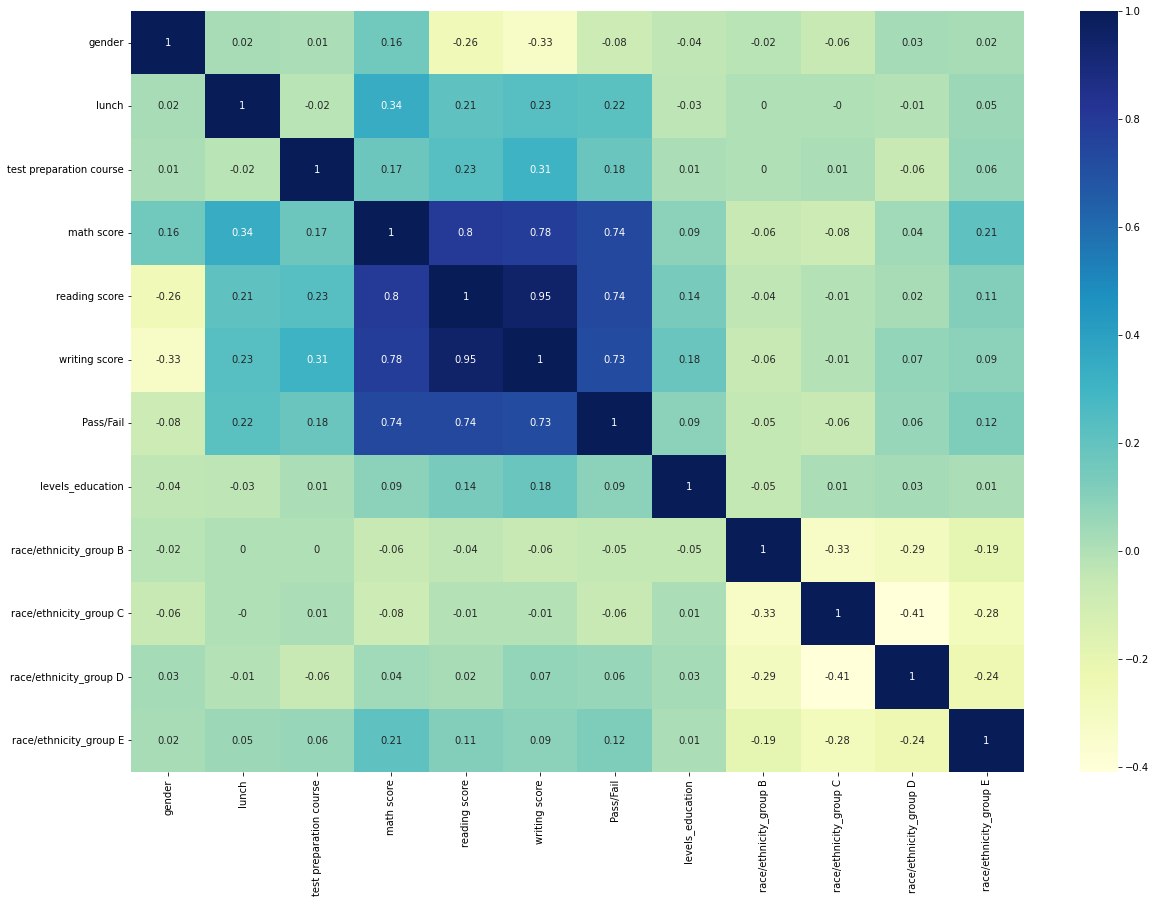

In [338]:
plt.figure(figsize=(20, 14))
sns.heatmap(df_dum.corr().round(2), annot=True, cmap="YlGnBu");

In [340]:
df_dum_corr_PF = df_dum.corr()[["Pass/Fail"]].drop("Pass/Fail").sort_values(by="Pass/Fail", ascending=False)
df_dum_corr_PF

,Pass/Fail
reading score,0.743
math score,0.735
writing score,0.729
lunch,0.217
test preparation course,0.177
race/ethnicity_group E,0.122
levels_education,0.087
race/ethnicity_group D,0.062
race/ethnicity_group B,-0.052
race/ethnicity_group C,-0.056


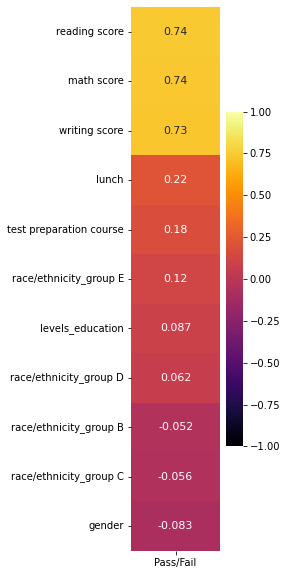

In [343]:
plt.figure(figsize = (2, 10))
sns.heatmap(df_dum_corr_PF, 
            annot=True, 
            cmap="inferno", 
            vmin=-1, 
            vmax=1, 
            annot_kws={"size": 11}, 
            cbar_kws={'shrink': 1})
plt.show()

### Result of the analyze this dataset:

- As a result of our analysis to understand the effect of various factors such as economic, personal and social on the performance of students; We made the passing grade successful when the math reading and writing grades were higher than the average.

- Eventually, the course grades directly affect the passing grade, they provide a positive and strong correlation with the pass and fail values. In addition, students's participation in lunch and test preparation course provides a positive correlation towards passing the course.